In [23]:
import pandas as pd
import yfinance as yf
from fredapi import Fred

# FRED API key 설정
fred = Fred(api_key='bc396b3f3aa67d41b00e0efdd609fc41')

# 경제 지표 코드 설정
economic_indicators = {
    'Interest Rate': 'FEDFUNDS',
    'Dollar Index': 'DTWEXBGS',
    'Unemployment Rate': 'UNRATE',
    'GDP Growth Rate': 'A191RL1Q225SBEA',
    'Yield Spread (10-Year vs 2-Year Treasury)': 'T10Y2Y',
    'Industrial Production Index': 'INDPRO',
    'Initial Jobless Claims': 'ICSA'
}

# S&P 500 일봉 데이터 가져오기 (2014년 5월 1일부터 시작)
sp500 = yf.download('^GSPC', start='2014-05-01', end='2024-06-27')

# 경제 지표 데이터를 저장할 DataFrame 생성
economic_data = pd.DataFrame()

# 경제 지표 데이터를 일봉으로 변환 및 forward fill
for indicator, code in economic_indicators.items():
    series = fred.get_series(code, start_date='2014-05-01', end_date='2024-07-27')
    series = series.asfreq('D').fillna(method='ffill')  # 일봉으로 변환 후 forward fill
    economic_data[indicator] = series

# S&P 500 데이터와 경제 지표 데이터 병합
merged_data = sp500.join(economic_data, how='inner')

# 2014년 6월 30일 이전 데이터 삭제 및 2024년 5월 31일 이후 데이터 삭제
final_data = merged_data[(merged_data.index >= '2014-06-30') & (merged_data.index <= '2024-06-27')]

# 데이터 확인 (선택 사항)
print(final_data.head())

# 파일로 저장
file_path = '/content/drive/MyDrive/Colab Notebooks/data/외부지표후보.csv'
final_data.to_csv(file_path)


[*********************100%%**********************]  1 of 1 completed
<ipython-input-23-7d113840ac98>:28: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  series = series.asfreq('D').fillna(method='ffill')  # 일봉으로 변환 후 forward fill
<ipython-input-23-7d113840ac98>:28: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  series = series.asfreq('D').fillna(method='ffill')  # 일봉으로 변환 후 forward fill
<ipython-input-23-7d113840ac98>:28: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  series = series.asfreq('D').fillna(method='ffill')  # 일봉으로 변환 후 forward fill
<ipython-input-23-7d113840ac98>:28: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  series = series.

                   Open         High          Low        Close    Adj Close  \
2014-06-30  1960.790039  1964.239990  1958.219971  1960.229980  1960.229980   
2014-07-01  1962.290039  1978.579956  1962.290039  1973.319946  1973.319946   
2014-07-02  1973.060059  1976.670044  1972.579956  1974.619995  1974.619995   
2014-07-03  1975.880005  1985.589966  1975.880005  1985.439941  1985.439941   
2014-07-07  1984.219971  1984.219971  1974.880005  1977.650024  1977.650024   

                Volume  Interest Rate  Dollar Index  Unemployment Rate  \
2014-06-30  3037350000           0.10       93.2058                6.1   
2014-07-01  3188240000           0.09       93.1365                6.2   
2014-07-02  2851480000           0.09       93.2478                6.2   
2014-07-03  1998090000           0.09       93.3149                6.2   
2014-07-07  2681260000           0.09       93.3803                6.2   

            GDP Growth Rate  Yield Spread (10-Year vs 2-Year Treasury)  \
2014-0

<ipython-input-23-7d113840ac98>:28: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  series = series.asfreq('D').fillna(method='ffill')  # 일봉으로 변환 후 forward fill


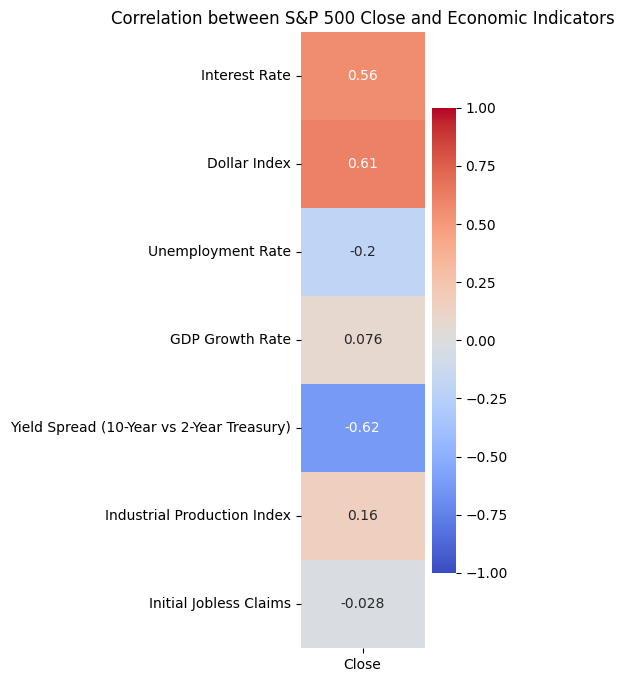

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

# S&P 500 종가와 경제 지표들 간의 상관관계 계산
correlation_matrix = final_data[['Close'] + list(economic_indicators.keys())].corr()

# Close 열과 나머지 지표들 간의 상관관계만 추출
correlation_with_close = correlation_matrix.loc[list(economic_indicators.keys()), ['Close']]

# 상관관계 히트맵 시각화
plt.figure(figsize=(2, 8))
sns.heatmap(correlation_with_close, annot=True, cmap='coolwarm', vmin=-1, vmax=1, cbar=True)
plt.title('Correlation between S&P 500 Close and Economic Indicators')
plt.show()
